In [121]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [122]:
train_df = pd.read_csv(r'C:\Users\sai\train.csv')

In [123]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [124]:
train_df = pd.read_csv(r'C:\Users\sai\train.csv')
train_df = pd.read_csv(r'C:\Users\sai\test.csv')



In [125]:
train_df.shape

(2551, 2)

In [126]:
train_df.head(15)

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False
5,Over the past five years the federal governmen...,True
6,Says that Tennessee law requires that schools ...,True
7,"Says Vice President Joe Biden ""admits that the...",False
8,Donald Trump is against marriage equality. He ...,True
9,We know that more than half of Hillary Clinton...,False


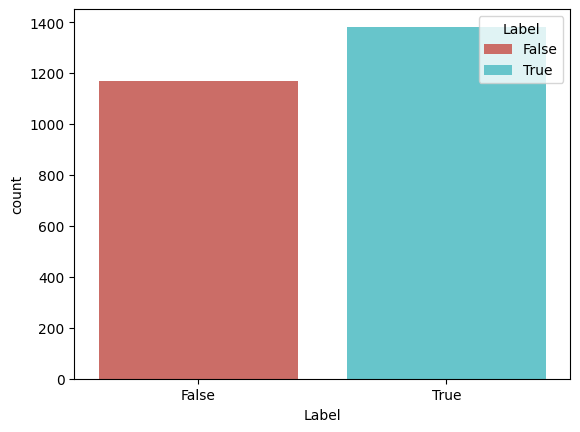

In [127]:
import seaborn as sb
def create_distribution(train_df):
# Assuming 'label' is the column containing the class labels
    sb.countplot(x='Label', data=train_df, hue='Label',palette='hls')
# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [128]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
check finished.


In [129]:
train_df = train_df.dropna()

In [130]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
check finished.


In [131]:
train_df.head(10)

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False
5,Over the past five years the federal governmen...,True
6,Says that Tennessee law requires that schools ...,True
7,"Says Vice President Joe Biden ""admits that the...",False
8,Donald Trump is against marriage equality. He ...,True
9,We know that more than half of Hillary Clinton...,False


In [132]:
train_df.reset_index(drop= True,inplace=True)

In [133]:
train_df.head(10)

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False
5,Over the past five years the federal governmen...,True
6,Says that Tennessee law requires that schools ...,True
7,"Says Vice President Joe Biden ""admits that the...",False
8,Donald Trump is against marriage equality. He ...,True
9,We know that more than half of Hillary Clinton...,False


In [134]:
label_train = train_df.Label

In [135]:
label_train.head(10)

0     True
1    False
2    False
3     True
4    False
5     True
6     True
7    False
8     True
9    False
Name: Label, dtype: bool

In [136]:
train_df = train_df.drop("Label", axis = 1)

In [137]:
train_df.head(10)

,Statement
0,Building a wall on the U.S.-Mexico border will...
1,Wisconsin is on pace to double the number of l...
2,Says John McCain has done nothing to help the ...
3,Suzanne Bonamici supports a plan that will cut...
4,When asked by a reporter whether hes at the ce...
5,Over the past five years the federal governmen...
6,Says that Tennessee law requires that schools ...
7,"Says Vice President Joe Biden ""admits that the..."
8,Donald Trump is against marriage equality. He ...
9,We know that more than half of Hillary Clinton...


In [138]:
train_df['Statement'][2188]

'Says US Rep Tom Price is sending letters both supporting and opposing the small-business killing Internet Tax Mandate'

In [139]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [140]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [141]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['Statement'][x] = review      

In [142]:
train_df['Statement'][2182]

'three half year campaigning lamar smith never appeared moderated debate defend position issue'

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['Statement'], label_train, test_size=0.3, random_state=1)

In [144]:
X_train

585     say prank phone call caused child taken parent...
2059    say texas university announced implemented degree
977           state employee actually going get pay raise
2339    president obamas american recovery reinvestmen...
2281    rhode island spends percent per caput human se...
                              ...                        
960           turned million deficit million surplus city
905      say oregon second fastest growing economy nation
1096    say new program jail time nonviolent mentally ...
235     average georgia family make le average family ...
1061      oil company currently million acre theyre using
Name: Statement, Length: 1785, dtype: object

In [145]:
X_train.shape

(1785,)

In [146]:
Y_train

585      True
2059    False
977     False
2339    False
2281     True
        ...  
960     False
905      True
1096     True
235      True
1061    False
Name: Label, Length: 1785, dtype: bool

In [147]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [148]:
tfidf_X_train.shape

(1785, 4485)

In [149]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [150]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 57.96%
Confusion matrix, without normalization


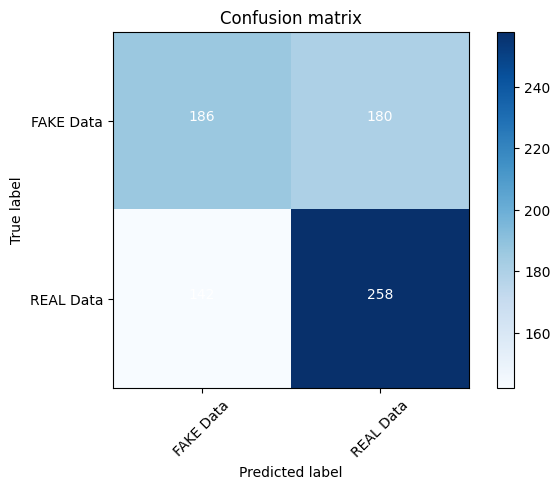

In [151]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [152]:
pickle.dump(classifier,open('./model.pkl', 'wb'))

In [153]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [154]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")